# Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../../Capstone/Data/FirstClean_MLB_Pitching_Data.csv')
data.head()

,name_common,age,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,...,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,22.0,430911.0,aardsda01,2004,SFG,1,NL,11,0,...,1.902,0.4803,-0.2167,-0.0298,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,David Aardsma,24.0,430911.0,aardsda01,2006,CHC,1,NL,45,0,...,1.909,0.5060,0.2700,-0.1301,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,David Aardsma,25.0,430911.0,aardsda01,2007,CHW,1,AL,25,0,...,1.924,0.4782,-0.5450,-0.1990,5.00394,1.920,0.4859,0.3459,74.086956,17.040
3,David Aardsma,26.0,430911.0,aardsda01,2008,BOS,1,AL,47,0,...,1.904,0.4836,-0.7708,-0.0632,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,David Aardsma,27.0,430911.0,aardsda01,2009,SEA,1,AL,73,0,...,1.899,0.5105,0.7665,0.1577,4.90529,1.911,0.4894,0.7666,168.910000,33.782


In [3]:
data=data.drop(['mlb_ID','player_ID','stint_ID','salary'], axis=1)

In [4]:
data.dtypes

name_common               object
age                      float64
year_ID                    int64
team_ID                   object
lg_ID                     object
G                          int64
GS                         int64
IPouts                     int64
IPouts_start             float64
IPouts_relief            float64
RA                         int64
xRA                      float64
xRA_sprp_adj             float64
xRA_def_pitcher          float64
PPF                        int64
PPF_custom               float64
xRA_final                float64
BIP                        int64
BIP_perc                 float64
RS_def_total             float64
runs_above_avg           float64
runs_above_avg_adj       float64
runs_above_rep           float64
RpO_replacement          float64
GR_leverage_index_avg    float64
WAR                      float64
teamRpG                  float64
oppRpG                   float64
pyth_exponent            float64
waa_win_perc             float64
WAA       

In [5]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['name_common', 'team_ID', 'lg_ID','year_ID',], axis=1)

In [6]:
data_num.head()

,age,G,GS,IPouts,IPouts_start,IPouts_relief,RA,xRA,xRA_sprp_adj,xRA_def_pitcher,...,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,22.0,11,0,32,0.0,32.0,8,5.967,-0.440,-0.423,...,1.902,0.4803,-0.2167,-0.0298,4.75633,1.895,0.4914,0.0942,66.675000,5.334
1,24.0,45,0,159,0.0,159.0,25,28.172,-2.076,-0.367,...,1.909,0.5060,0.2700,-0.1301,4.97303,1.919,0.4896,0.4682,114.295833,27.431
2,25.0,25,0,97,0.0,97.0,24,17.999,-1.343,-1.327,...,1.924,0.4782,-0.5450,-0.1990,5.00394,1.920,0.4859,0.3459,74.086956,17.040
3,26.0,47,0,146,0.0,146.0,32,26.131,-1.942,0.663,...,1.904,0.4836,-0.7708,-0.0632,4.81624,1.901,0.4888,0.5205,83.796667,25.139
4,27.0,73,0,214,0.0,214.0,23,39.221,-2.895,3.136,...,1.899,0.5105,0.7665,0.1577,4.90529,1.911,0.4894,0.7666,168.910000,33.782


In [7]:
data_num.columns

Index(['age', 'G', 'GS', 'IPouts', 'IPouts_start', 'IPouts_relief', 'RA',
       'xRA', 'xRA_sprp_adj', 'xRA_def_pitcher', 'PPF', 'PPF_custom',
       'xRA_final', 'BIP', 'BIP_perc', 'RS_def_total', 'runs_above_avg',
       'runs_above_avg_adj', 'runs_above_rep', 'RpO_replacement',
       'GR_leverage_index_avg', 'WAR', 'teamRpG', 'oppRpG', 'pyth_exponent',
       'waa_win_perc', 'WAA', 'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep',
       'waa_win_perc_rep', 'WAR_rep', 'ERA_plus', 'ER_lg'],
      dtype='object')

In [8]:
data_objects=data.drop(['age', 'G', 'GS', 'IPouts', 'IPouts_start', 'IPouts_relief', 'RA',
       'xRA', 'xRA_sprp_adj', 'xRA_def_pitcher', 'PPF', 'PPF_custom',
       'xRA_final', 'BIP', 'BIP_perc', 'RS_def_total', 'runs_above_avg',
       'runs_above_avg_adj', 'runs_above_rep', 'RpO_replacement',
       'GR_leverage_index_avg', 'WAR', 'teamRpG', 'oppRpG', 'pyth_exponent',
       'waa_win_perc', 'WAA', 'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep',
       'waa_win_perc_rep', 'WAR_rep', 'ERA_plus', 'ER_lg'], axis=1)

In [9]:
data_objects.head()

,name_common,year_ID,team_ID,lg_ID
0,David Aardsma,2004,SFG,NL
1,David Aardsma,2006,CHC,NL
2,David Aardsma,2007,CHW,AL
3,David Aardsma,2008,BOS,AL
4,David Aardsma,2009,SEA,AL


In [10]:
data_num.skew()

age                       0.745195
G                         0.765744
GS                        1.258301
IPouts                    1.178460
IPouts_start              1.466192
IPouts_relief             1.363788
RA                        1.082143
xRA                       1.148962
xRA_sprp_adj              0.460101
xRA_def_pitcher           0.104837
PPF                       1.091220
PPF_custom               -3.332737
xRA_final                 1.224008
BIP                       1.178940
BIP_perc                  1.148256
RS_def_total             -0.123042
runs_above_avg            1.188651
runs_above_avg_adj        1.149420
runs_above_rep            1.803666
RpO_replacement           0.148842
GR_leverage_index_avg     1.610771
WAR                       1.988070
teamRpG                  -0.019408
oppRpG                    1.266966
pyth_exponent           -11.157560
waa_win_perc             -1.213495
WAA                       1.572908
WAA_adj                   2.540058
oppRpG_rep          

In [11]:
data_num["age.Skew"]= stats.yeojohnson(data_num["age"])[0]
data_num["G.Skew"]= stats.yeojohnson(data_num["G"])[0]
data_num["GS.Skew"]= stats.yeojohnson(data_num["GS"])[0]
data_num["IPouts.Skew"]= stats.yeojohnson(data_num["IPouts"])[0]
data_num["IPouts_start.Skew"]= stats.yeojohnson(data_num["IPouts_start"])[0]
data_num["IPouts_relief.Skew"]= stats.yeojohnson(data_num["IPouts_relief"])[0]
data_num["RA.Skew"]= stats.yeojohnson(data_num["RA"])[0]
data_num["xRA.Skew"]= stats.yeojohnson(data_num["xRA"])[0]
data_num["PPF.Skew"]= stats.yeojohnson(data_num["PPF"])[0]
data_num["PPF_custom.Skew"]= stats.yeojohnson(data_num["PPF_custom"])[0]
data_num["xRA_final.Skew"]= stats.yeojohnson(data_num["xRA_final"])[0]
data_num["BIP.Skew"]= stats.yeojohnson(data_num["BIP"])[0]
data_num["BIP_perc.Skew"]= stats.yeojohnson(data_num["BIP_perc"])[0]
data_num["runs_above_avg.Skew"]= stats.yeojohnson(data_num["runs_above_avg"])[0]
data_num["runs_above_avg_adj.Skew"]= stats.yeojohnson(data_num["runs_above_avg_adj"])[0]
data_num["runs_above_rep.Skew"]= stats.yeojohnson(data_num["runs_above_rep"])[0]
data_num["GR_leverage_index_avg.Skew"]= stats.yeojohnson(data_num["GR_leverage_index_avg"])[0]
data_num["WAR.Skew"]= stats.yeojohnson(data_num["WAR"])[0]
data_num["oppRpG.Skew"]= stats.yeojohnson(data_num["oppRpG"])[0]
data_num["pyth_exponent.Skew"]= stats.yeojohnson(data_num["pyth_exponent"])[0]
data_num["waa_win_perc.Skew"]= stats.yeojohnson(data_num["waa_win_perc"])[0]
data_num["WAA.Skew"]= stats.yeojohnson(data_num["WAA"])[0]
data_num["WAA_adj.Skew"]= stats.yeojohnson(data_num["WAA_adj"])[0]
data_num["oppRpG_rep.Skew"]= stats.yeojohnson(data_num["oppRpG_rep"])[0]
data_num["pyth_exponent_rep.Skew"]= stats.yeojohnson(data_num["pyth_exponent_rep"])[0]
data_num["waa_win_perc_rep.Skew"]= stats.yeojohnson(data_num["waa_win_perc_rep"])[0]
data_num["WAR_rep.Skew"]= stats.yeojohnson(data_num["WAR_rep"])[0]
data_num["ERA_plus.Skew"]= stats.yeojohnson(data_num["ERA_plus"])[0]
data_num["ER_lg.Skew"]= stats.yeojohnson(data_num["ER_lg"])[0]

In [12]:
data_num_norm=data_num.drop(["age",
"G",
"GS",
"IPouts",
"IPouts_start",
"IPouts_relief",
"RA",
"xRA",
"PPF",
"PPF_custom",
"xRA_final",
"BIP",
"BIP_perc",
"runs_above_avg",
"runs_above_avg_adj",
"runs_above_rep",
"GR_leverage_index_avg",
"WAR",
"oppRpG",
"pyth_exponent",
"waa_win_perc",
"WAA",
"WAA_adj",
"oppRpG_rep",
"pyth_exponent_rep",
"waa_win_perc_rep",
"WAR_rep",
"ERA_plus",
"ER_lg"],axis=1)

In [13]:
data_num_norm.skew()

xRA_sprp_adj                  0.460101
xRA_def_pitcher               0.104837
RS_def_total                 -0.123042
RpO_replacement               0.148842
teamRpG                      -0.019408
age.Skew                      0.010871
G.Skew                       -0.113528
GS.Skew                       0.293848
IPouts.Skew                  -0.094520
IPouts_start.Skew             0.100647
IPouts_relief.Skew           -0.570491
RA.Skew                      -0.067096
xRA.Skew                     -0.076006
PPF.Skew                      0.000000
PPF_custom.Skew               0.828122
xRA_final.Skew               -0.066831
BIP.Skew                     -0.084627
BIP_perc.Skew                 0.286486
runs_above_avg.Skew          -0.119363
runs_above_avg_adj.Skew      -0.120072
runs_above_rep.Skew          -0.083294
GR_leverage_index_avg.Skew    0.018739
WAR.Skew                     -0.209667
oppRpG.Skew                   0.331771
pyth_exponent.Skew            0.524473
waa_win_perc.Skew        

**_The data has been successfully normalized, as the skew values are between -0.5 and 0.5._**

## Z Score

In [16]:
data_num_norm.columns

Index(['xRA_sprp_adj', 'xRA_def_pitcher', 'RS_def_total', 'RpO_replacement',
       'teamRpG', 'age.Skew', 'G.Skew', 'GS.Skew', 'IPouts.Skew',
       'IPouts_start.Skew', 'IPouts_relief.Skew', 'RA.Skew', 'xRA.Skew',
       'PPF.Skew', 'PPF_custom.Skew', 'xRA_final.Skew', 'BIP.Skew',
       'BIP_perc.Skew', 'runs_above_avg.Skew', 'runs_above_avg_adj.Skew',
       'runs_above_rep.Skew', 'GR_leverage_index_avg.Skew', 'WAR.Skew',
       'oppRpG.Skew', 'pyth_exponent.Skew', 'waa_win_perc.Skew', 'WAA.Skew',
       'WAA_adj.Skew', 'oppRpG_rep.Skew', 'pyth_exponent_rep.Skew',
       'waa_win_perc_rep.Skew', 'WAR_rep.Skew', 'ERA_plus.Skew', 'ER_lg.Skew'],
      dtype='object')

In [17]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num_norm = scaler.fit_transform(data_num_norm)
data_num_zs = pd.DataFrame(data_num_norm)

In [19]:
data_num_zs.columns=['xRA_sprp_adj', 'xRA_def_pitcher', 'RS_def_total', 'RpO_replacement',
       'teamRpG', 'age', 'G', 'GS', 'IPouts',
       'IPouts_start', 'IPouts_relief', 'RA', 'xRA',
       'PPF', 'PPF_custom', 'xRA_final', 'BIP',
       'BIP_perc', 'runs_above_avg', 'runs_above_avg_adj',
       'runs_above_rep', 'GR_leverage_index_avg', 'WAR',
       'oppRpG', 'pyth_exponent', 'waa_win_perc', 'WAA',
       'WAA_adj', 'oppRpG_rep', 'pyth_exponent_rep',
       'waa_win_perc_rep', 'WAR_rep', 'ERA_plus', 'ER_lg']

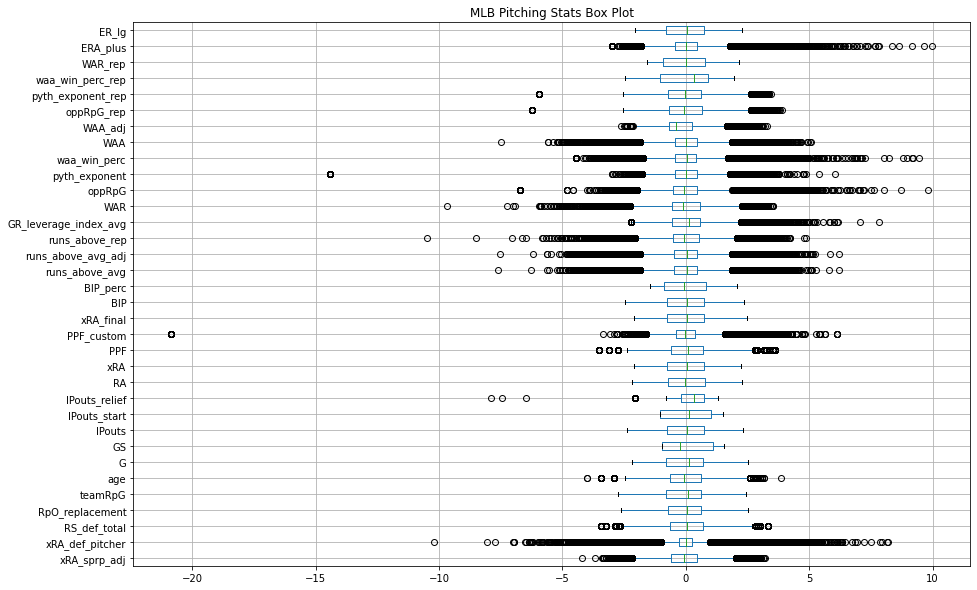

In [20]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Pitching Stats Box Plot')
plt.show()

**_There are many outliers. Lets see what 3 STD does_**

## 3 STD

In [21]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [22]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

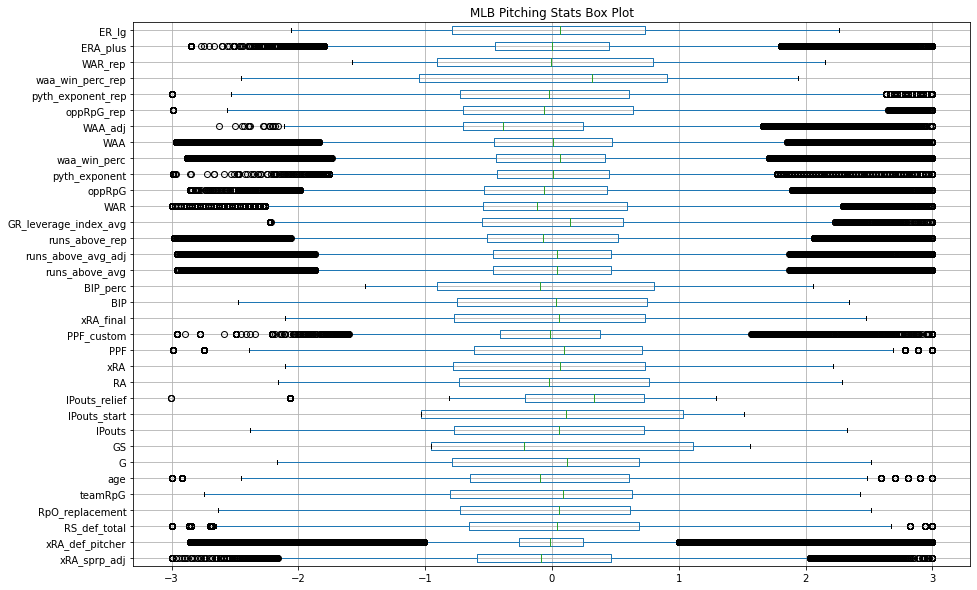

In [23]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('MLB Pitching Stats Box Plot')
plt.show()

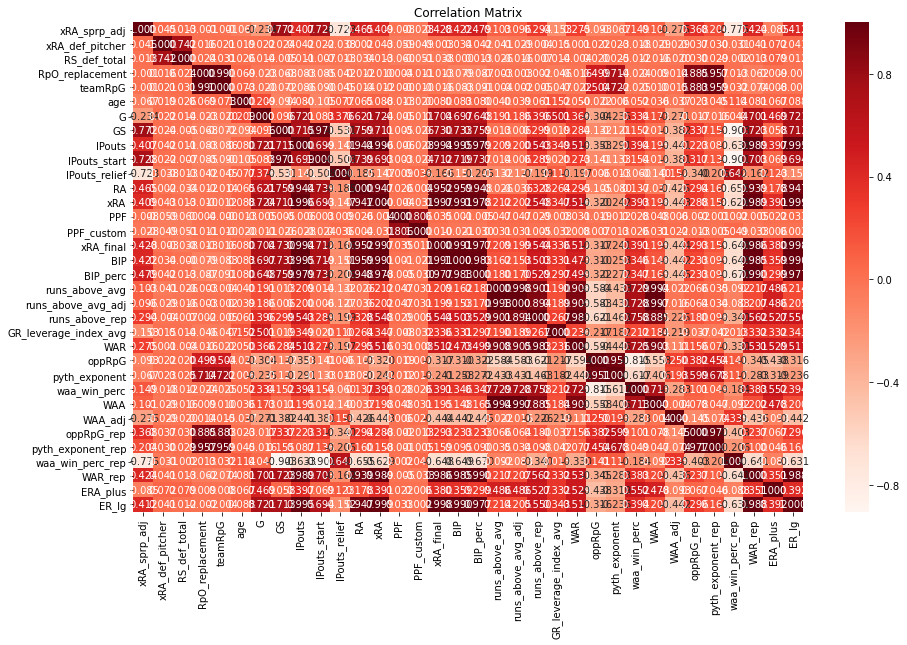

In [24]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [25]:
MLB_Ppipeline1=pd.concat([data_objects, data_num_zs], axis=1)

In [26]:
MLB_Ppipeline1.head()

,name_common,year_ID,team_ID,lg_ID,xRA_sprp_adj,xRA_def_pitcher,RS_def_total,RpO_replacement,teamRpG,age,...,pyth_exponent,waa_win_perc,WAA,WAA_adj,oppRpG_rep,pyth_exponent_rep,waa_win_perc_rep,WAR_rep,ERA_plus,ER_lg
0,David Aardsma,2004,SFG,NL,-0.235111,-0.168756,-1.131299,0.334052,0.537732,-1.639536,...,0.334768,-0.132935,-0.108598,-0.223338,0.011131,0.231446,1.102892,-1.152259,-0.556962,-1.021506
1,David Aardsma,2006,CHC,NL,-1.127094,-0.148680,-0.273196,0.781469,1.046313,-0.950150,...,0.414066,0.243431,0.347895,-0.776132,0.491663,0.767568,0.948991,-0.023940,0.350133,0.236178
2,David Aardsma,2007,CHW,AL,-0.727446,-0.492837,-1.600033,1.172959,1.026056,-0.643021,...,0.584775,-0.162888,-0.461935,-1.008741,0.561573,0.790787,0.652706,-0.321927,-0.399802,-0.184497
3,David Aardsma,2008,BOS,AL,-1.054034,0.220572,0.515466,0.781469,0.623642,-0.357360,...,0.357401,-0.085625,-0.723615,-0.466037,0.142303,0.361738,0.882688,0.088441,-0.204403,0.155605
4,David Aardsma,2009,SEA,AL,-1.573630,1.107136,1.946466,1.005178,0.867454,-0.090951,...,0.300854,0.311221,0.745809,1.983143,0.339647,0.584389,0.932296,0.525550,1.194354,0.434936


In [27]:
MLB_Ppipeline1.to_csv('../../Capstone/Data/MLB_Ppipeline1.csv', index=0)